<a href="https://colab.research.google.com/github/Leila828/Learning_JAX_for_deepLearning/blob/main/JAX_Programming_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Functional programming (FP)#**
Functional programming is a paradigm focused on functions. It’s okay if you are unfamiliar with functional programming because JAX mainly centers around just one of its key features.

Pure functions# **bold text** **bold text**
Pure functions are similar to mathematical functions and have the following properties:

Identical outputs: No matter how many times we run the function, it gives the same output for the same tuple of inputs.
No side-effects: The function doesn’t change any variable other than variables in its local scope.
Examples#
Here is a basic example of a pure function:

In [ ]:
def Square(x):
  return x*x

On the other hand, here is a counter-example of an impure function:

In [ ]:
a = 10

def Func(x):
  global a
  a = a+1     #changing the value of non-local variable a

def Func2(x):
  print("Executing..") #Any I/O operation is a side-effect

#In case one would like to see the change in a
Func(a)
print(a)  #value is changed

11


Since JAX always expects a pure function for transformation or compilation, we should make sure to observe this practice whenever writing JAX code.


JAX Numpy
JAX has its own variant of NumPy, which we can import as:

One might worry that we have to re-learn a new NumPy from scratch, but luckily the syntax of NumPy and JAX is the same. For example:

In [ ]:
import numpy as np
import jax.numpy as jnp

# We have used the respective prefixes to make it easy to distinguish 
# between NumPy and JAX arrays.

#Initializing NumPy arrays
np_a = np.arange(9)
np_b = np.linspace(0,20,num=5)
np_c = np.zeros(15)
np_d = np.ones(10)

#Initializing JAX arrays
jnp_a = jnp.arange(9)
jnp_b = jnp.linspace(0,20,num=5)
jnp_c = jnp.zeros(15)
jnp_d = np.ones(10)

#NumPy arrays
print("Printing NumPy arrays")
print(np_a)
print(np_b)
print(np_c)
print(np_d)

#JAX arrays
print("Printing JAX arrays")
print(jnp_a)
print(jnp_b)
print(jnp_c)
print(jnp_d)

Differences
Despite their similarities, there are still a few differences between NumPy and JAX. Also, it’s important to remember that JAX NumPy is not a rival library to NumPy, but is instead supposed to enhance its experience. If we can’t find a feature in JAX, we can always switch to default NumPy, but it should be the last option, though, as NumPy code is unable to use the GPU/TPU.

Type
As we can quickly check using type(), NumPy and JAX arrays differ by their respective datatypes:


In [ ]:
import numpy as np
import jax
import jax.numpy as jnp

np_a = np.array((1,2,3))
print("Type of array a is",type(np_a))
jnp_b = jnp.array((1,2,3))
print("Type of array b is",type(jnp_b))

GPU/TPU usage
While NumPy arrays cannot harness the powers of GPU/TPU, JAX arrays look out for them by default before switching back to CPU (if they are unable to find any). That’s why our programs issue a warning of No GPU/TPU found.

Mutability
NumPy arrays are mutable. For example:

In order to suppress the warning of No GPU/TPU found, we can set the default device to CPU as:

jax.config.update('jax_platform_name','cpu')
We will use this setting from now on.

In [ ]:
import numpy as np

np_a = np.array((1,2,3))
print(np_a)

#Mutating the array is allowed
np_a[2] = 12
print(np_a)

In [ ]:
import jax
import jax.numpy as jnp

jnp_a = jnp.array((1,2,3))
print(jnp_a)

#Mutating the array is NOT allowed
jnp_a[2] = 12
print(jnp_a)


Random numbers generation
JAX and NumPy also differ in random numbers generation algorithm, a feature covered later in this course.

Use of built-in Python structures
Unlike NumPy, JAX doesn’t allow the use of Python’s built-in data structures like list or tuple. JAX will only work on either a JAX array, a NumPy array, or a scalar.

This example will illustrate the difference:

In [ ]:
import numpy as np
import jax.numpy as jnp

def FuncA(x):
  return np.dot(x,x)

def FuncB(x):
  return jnp.dot(x,x) #JAX Version

np_a = np.arange(10)
jnp_b = jnp.arange(10)

#And couple of primitive structures
c = [1,2,3,4,5]
d = (1,2,1,4,2)

#Works for all of them
print(FuncA(np_a))
print(FuncA(jnp_b))
print(FuncA(c))
print(FuncA(d))

print("Testing JAX version on both JNP and NP Arrays")
print(FuncB(np_a))
print(FuncB(jnp_b))

#JNP Version doesn't for Python structures - expect errors
print("Testing JAX version on Python structures")
print(FuncB(c)) 
print(FuncB(d)) 

**Just-in-Time (JIT) Compilation**


**What is JIT?#**
Anyone who has some experience with Java or .NET frameworks will be familiar with Just-In-Time compilation. In Just-In-Time (JIT) compilation, we compile the code at the run-time -
−
 also known as dynamic translation -
−
 which results in high-speed code execution

**Python and JIT#**
One of the major criticisms of Python is its slow execution. However, inspired by .NET framework and Objective-C/Swift, there have been some JIT attempts in Python. Some of the notable examples include CPython and PyPy.

**XLA compiler#**
JAX uses JIT compilation, which enables simple Python functions to target the XLA compiler. Before we move on, it would be worthwhile to give a brief introduction to XLA.

XLA (Accelerated Linear Algebra) is a domain-specific compiler. Originally developed for Tensorflow, XLA allows faster code and more efficient memory usage.

JIT compilation enables XLA to compile the given code into computation kernels that are specific to the given model, which helps to improve performance.

**JAX JIT#**
JAX operations can be either:

Static
Dynamic/Traced
Static operations are evaluated on the compile-time, and cannot target the XLA compiler as dynamic/traced operations do.

Luckily, most JAX operations are expressable in XLA terms. All we need to do to achieve this is to import the required library and call the respective function using the jit.

Let’s illustrate some of the features of jit using an example.

We’ll begin by making a simple function to demonstrate the difference between standard Python and JIT compilation by a simple square function:

In [ ]:
from jax import jit

#Normal Square Function
def Square(x):
    print("Running the Non-JIT function")
    ans = x*x
    print("x square is: ",ans)
    return ans    

#Now run the JIT version
@jit
def JIT_Square(x):
    print("Running the JIT function")
    ans = x*x
    print("x square is: ",ans)
    return ans

x = 4.2
print(Square(x))
print("------Here comes the interesting part-------")
print(JIT_Square(x))  

#you can also execute a non-jit using JIT as follows:
#print(jit(Square)(x))

Running the Non-JIT function
x square is:  17.64
17.64
------Here comes the interesting part-------
Running the JIT function
x square is:  Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>
17.639997


The above example demonstrates a clear distinction between “JITing” a function and running it normally. While both functions return the same value, the difference lies in their interim evaluation -
−
 that is, within the function.

Since JIT preempts the result, we cannot get a concrete value within the function and instead get the tracer object.

The difference between the two answers is due to the 32-bit precision enforced by JAX. Floating-point numbers act unexpectedly at times in 32-bit due to base-2 power representation so it’s preferable to use 64-bit precision in critical problems.
https://stackoverflow.com/a/588014/1698143

**Tracer objects#**
As shown in the example above, JIT basically uses the tracer objects to preempt the sequence of operations outlined by the function.

This preemption can lead to some issues as well. For example, using a tracer object’s value in an if-else will result in the following error.

Abstract tracer value encountered where concrete value is expected.

In [ ]:
from jax import jit

#Normally running JIT code
@jit
def F(x):
    for i in range(1,10):
        x=x+i
    return x

a = 2.0
print(F(a))   

#Tracer object's value is undetermined
@jit
def H(x):
    if(x>0):
        print("Positive")
    else:
        print("Zero or negative!")

def G(x):
    if(x>0):
        print("Positive")
    else:
        print("Zero or negative!")

G(4) #will run without any error
H(4) #throws error

This restriction is limited to the selection structures. If we use the same @jit decorator for some loop, the code will run without any issue (assuming there is no selection structure).

**JAX Expressions (Jaxpr)**

We just discussed how trace objects are used to preempt the sequence of operations outlined in the function. These extracted JAX expressions are discussed in this lesson.

Lambda expressions#
Before beginning the JAX expressions, it is helpful to have a quick introduction of Lambda expressions.

Lambda expressions are usually used for anonymous functions. Defining them is pretty easy:

Specify the lambda keyword
Outline the parameters (enclosed by :).
Specify the expression body.
For example, a simple Lambda expression to calculate the circumference of a circle is:

In [ ]:
print((lambda x: 2*jnp.pi*x)(2))

Similarly, below is an example of a lambda expression with multiple variables to calculate the area of a triangle:

In [ ]:
print((lambda b,h: (1/2)*b*h)(2,3))

JAX expressions#
As we saw earlier, tracer objects are encoded in a JAX Expression (or jaxpr in short) while used to extract the sequence of operations from the function.

Let’s go over the background JAX expression (referred to as jaxpr subsequently). We can import the relevant library as follows:

In [ ]:
from jax import make_jaxpr

Let’s begin with a simple example first:

f(x,y) = 2x^2+3y


In [ ]:
from jax import make_jaxpr

@jit
def F(x,y):
    return 2*x*x+3*y

jxpr_F = make_jaxpr(F) #making Expression Tree for the given JIT Function

a = 2.0
b = 4.0
print(F(a,b)) 
print(jxpr_F(a,b)) 

The output contains the following jaxpr:

call_jaxpr=
{ 
lambda  ; a b.
let c = mul a 2.0
d = mul c a
e = mul b 3.0
f = add d e
in (f,) }

In [ ]:
call_jaxpr=
{ 
lambda  ; a b.
let c = mul a 2.0
d = mul c a
e = mul b 3.0
f = add d e
in (f,) }

From here, we can easily decode it back into the whole expression tree.

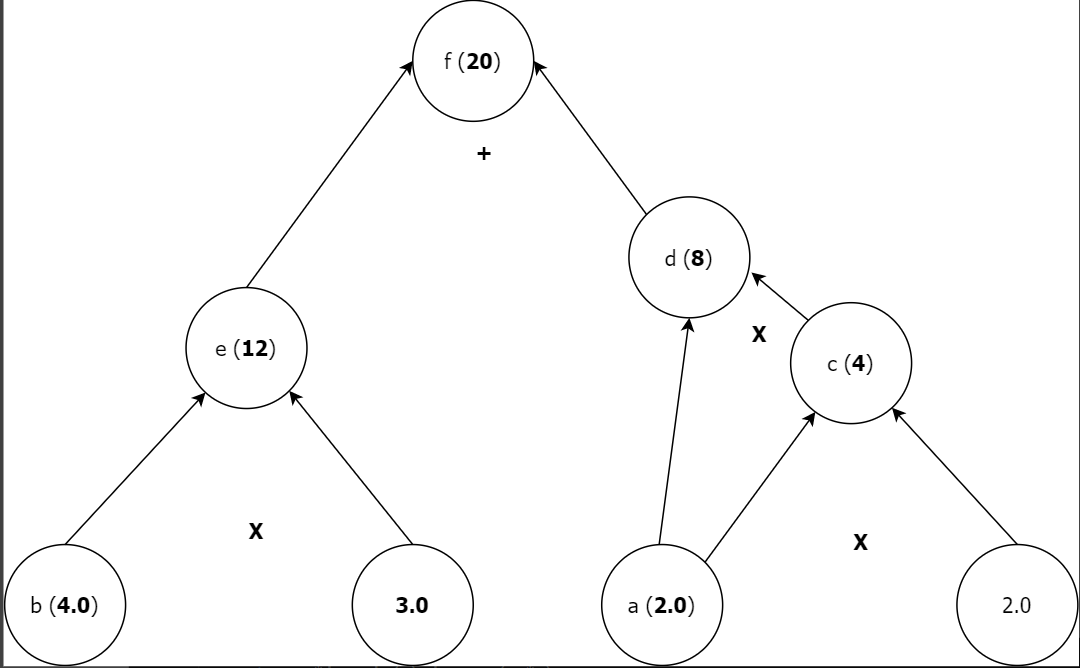

Let’s look at another example before we conclude:

In [ ]:
def F_NonJit(x,y):
    return 2*jnp.sin(x)+jnp.exp(-3*y)

@jit
def F(x,y):
    return 2*jnp.sin(x)+jnp.exp(-3*y)

jxpr_F = make_jaxpr(F) 
jxpr_F_NonJit = make_jaxpr(F_NonJit)
a = jnp.pi/2
b = 4.0
print(F(a,b)) 
print(jxpr_F(a,b)) 
print("Non Jit's Jaxpr")
print(jxpr_F_NonJit(a,b))

What’s the difference between the jaxpr for a JIT and the “non-JIT” function, though? As we have seen in the examples above:

Expression trees are the same for both.
The only difference lies in the XLA call and some device-related information.
These JAX expressions can be quite helpful in analyzing our JIT codes, as we’ll see over the rest of the course.

**Asynchronous Dispatch**

Introductory example#
We have already talked about the JIT’s usefulness. Now let’s take a look at the difference in speed between a JIT and a normal function:

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import jit
import timeit

#Normal Function
def FuncA(x,y):
  return np.asarray(np.dot(x,y))

#And JIT version
@jit
def FuncB(x,y):
  return jnp.dot(x,y)

x = jnp.ones((1000,1000))

start_time = timeit.default_timer()
FuncA(x,x)

print("Total time taken for normal function:", timeit.default_timer() - start_time)

start_time = timeit.default_timer()
FuncB(x,x)

print("Total time taken for JIT function:", timeit.default_timer() - start_time)

Total time taken for normal function: 0.02740909199997077
Total time taken for JIT function: 0.015167289000032724


If we run the above code on the CPU, the output should be fairly straightforward.

If we run it on GPU/TPU, on the other hand, the output is quite astonishing. The JAX JIT function is almost three times faster than the “non-JIT” function and completes within 0.02sec for a 1000\times1000
1000×1000
 array.

This result can be misleading, though. We need to examine some of the background mechanisms to fully understand what is happening here.

**Actual mechanism#**
When an operation (like jnp.dot() above) is executed, JAX doesn’t wait for the whole result and instead returns a DeviceArray value. This may result in an erroneous result (well, more of a misleading result), but it can still be helpful. For example:

We can pass a computation to another computation without waiting for the final result.
We can infer the type or size of a DeviceArray in advance.
It is also helpful that we can pipeline our operations without waiting for the outputs and thus can avoid being blocked.

However, if we want to determine the actual execution time, we should block the function call to wait until the computation is completed. The block_until_ready() operation does just this:

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Normal Function
def FuncA(x,y):
  return np.asarray(np.dot(x,y))

#And JIT version
@jit
def FuncB(x,y):
  return jnp.dot(x,y)


x = jnp.ones((1000, 1000))

start_time = timeit.default_timer()
FuncA(x,x)
print("Total time taken for normal function:", timeit.default_timer() - start_time)

start_time = timeit.default_timer()
FuncB(x,x).block_until_ready()
print("Total time taken for JIT function:", timeit.default_timer() - start_time)

Total time taken for normal function: 0.02155420300005062
Total time taken for JIT function: 0.01580735100014863


**Auto-differentiation***
**Background#**
First pioneered by the seminal work of Rumelhart and Hinton in 1986, the majority of current machine learning optimization methods use derivatives. So, there is a pressing need for their efficient calculation.

**Manual calculations#**
Most of the early machine learning researchers and scientists -
−
 for example, Bottou, 1998 for Stochastic Gradient Descent -
−
 had to go through a slow, laborious process of manual calculation of analytical derivatives, which is prone to error.

Using computer program# **bold text**
Programming-based solutions are less laborious, but calculating these derivatives in a program can also be tricky. We can categorize them into three paradigms:

Symbolic differentiation
Numeric differentiation
Auto differentiation
The first and second methods are prone to errors, including:

Calculating higher-derivatives is tricky due to long and complex expressions for symbolic differentiation and rounding-off errors —
—
 meaning less accurate results —
—
 in numeric differentiation.
Numeric differentiation uses discretization, which results in loss of accuracy.
Symbolic differentiation can lead to inefficient code.
Both are slow to calculate the partial derivatives, a key feature of gradient-based optimization algorithms.
Automatic differentiation#
Automatic differentiation (also known as autodiff) addresses all the issues above and is a key feature of modern ML/DL libraries.

**Chain rule#**
Autodiff centers around the concept of the chain rule, the fundamental rule in calculus used to calculate derivatives of the composed functions.

For example,

y = 2x^2 
y=2x 
2
 +4

and,

x = 3w
x=3w

Obviously, differentiating y with respect to w (i.e.\frac{dy}{dw}
dw
dy
​
 
) is not directly possible. Instead, it will be calculated indirectly using the chain rule:

\frac {dy}{dx} = 4x
dx
dy
​
 =4x

\frac {dx}{dw} = 3
dw
dx
​
 =3

and,

\frac {dy}{dw} = \frac {dy}{dx} \times \frac {dx}{dw} = 12x = 36w
dw
dy
​
 = 
dx
dy
​
 × 
dw
dx
​
 =12x=36w

There are a couple of ways to calculate the products using the chain rule.

Forward accumulation#
In forward accumulation, we fix the independent variable and compute gradients recursively.

Reverse accumulation#
Usually, in deep learning (i.e. backpropagation), we use reverse accumulation in all the major frameworks like PyTorch or Tensorflow.

JAX is even better at performing both types of accumulation. The choice to use forward or reverse accumulation usually depends on the number of features, but reverse accumulation is generally the default method in deep learning.

note: Recent research published by Princeton researchers (ICLR 2021 oral) realizes the fundamental question related to automatic differentiation in deep learning -
−
 “Why spend computation and memory on exact (minibatch) gradients only to use them for stochastic optimization?” -
−
 and saves both computation and memory by inexact gradients using automatic differentiation.

Auto-differentiation in JAX#
Let’s move on from the theoretical background for now and instead, start on importing the JAX autograd library and begin working out the gradients.

JAX provides the grad() function to calculate derivatives. If we have a function f in the code as Func(), then grad(Func()) will represent the \Delta f
Δf
.

Note: Evaluating the gradient for any value is just like the evaluation of a function at a given value.

In [ ]:
from jax import grad

def FuncY(a):
  return 4*a*a+2*a+5

dy = (grad(FuncY))

print(dy(2.0))

If we input 2
2
 in the example above (in lieu of 2.0), JAX will throw an error. This is because grad() required real or complex inputs.

Higher derivatives#
We can call grad() recursively to calculate the higher derivatives. For example:

In [ ]:
def FuncY(a):
  return 4*a*a+2*a+5

dy = (grad(FuncY))
dy2 = grad(grad(FuncY))
dy3 = grad(grad(grad(FuncY)))

a = 2.0
print(dy(a))
print(dy2(a))
print(dy3(a))

**Chain rule using grad()#**
As mentioned earlier, the core feature of the auto differentiation paradigm is the chain rule, which is further illustrated by this example:

In [ ]:
a = 0.0

diff_exp = grad(jnp.exp) #Derivative of exponential is exp itself.

print(jnp.exp(a))
print(diff_exp(a))

def sigmoid(x):
  return 1/(1 +jnp.exp(-x))

diff_sigmoid = grad(sigmoid)

print(sigmoid(a))
print(diff_sigmoid(a))

Although the sigmoid() itself is defined in terms of exp(), the chain rule allows us to calculate the derivative seamlessly.

Partial derivatives#
In the case of a multivariate function, we are often interested in calculating its partial derivatives (that is, concerning the variable of our interest). For example:

f(x,y) = 3x^2 +2 e^{-y}
f(x,y)=3x 
2
 +2e 
−y
 

will have the following partial derivatives with respect to x and y respectively:

\frac{\partial f}{\partial x} = 6x
∂x
∂f
​
 =6x

\frac{\partial f}{\partial y} = -2e^{-y}
∂y
∂f
​
 =−2e 
−y
 

It comes as no surprise that deep learning engineers and researchers tend to use backpropagation and, inevitably, partial derivatives.

Calculating partial derivatives is also pretty simple:

In [ ]:
def AffineFunction(a,b,x):
  return a*x+b

partial_a = grad(AffineFunction) #By default, it takes the first argument as diff. variable
partial_b = grad(AffineFunction, argnums=1) #Note the use of argnums to use the partial derivative variable

#Values are kept simple for the ease in manual comparison (if one would like to)
a = 1.0
b = 2.0
x = 10.0

y = AffineFunction(a,b,x)
dy_da = partial_a(a,b,x)
dy_db = partial_b(a,b,x)

print("Value of y at given values is:", y)
print("Value of ∂y/∂a at given values is:", dy_da)
print("Value of ∂y/∂b at given values is:", dy_db)

**value_and_grad()#**
We use two different functions or variables in the codes above to evaluate a function and its gradient separately. By using value_and_grad(), we can calculate both collectively.

In [ ]:
a = 0.0

diff_exp = jax.value_and_grad(jnp.exp) #Derivative of exponential is exp itself.

print(diff_exp(a))

def sigmoid(x):
  return 1/(1 +jnp.exp(-x))

diff_sigmoid = jax.value_and_grad(sigmoid)
print(diff_sigmoid(a))

This is just an introduction to auto-differentiation in JAX. We’ll come back to this topic in the later chapters to cover the advanced features.

**Pytrees**

Introduction#
Pytrees are tree structures built out of container-like Python objects. Basically, they are nested structures. For example:

In [ ]:
pyTree1 = [
    jnp.ones((2,2)),
    (1, 3, 3),
    {2, 4},
    [(1,2),{1}],
    [jnp.ones((1,2)),{2,3},[7,-2]],
    [np.ones((1,2)),(0,9)]
]

for pytree in pyTree1:
  leaves = jax.tree_leaves(pytree)
  print(f"{repr(pytree):<50} has {len(leaves)}", "leaves:" if len(leaves)>1 else "leaf:",f"{leaves}")

**Common functions#**
In Python, map() takes a function and applies it to the whole container of objects. JAX enables us to do the same on Pytrees using tree_map().

In [ ]:
from jax import tree_map

pyTree1 = [
    jnp.ones((2,2)),
    (1, 3, 3),
    [(1,2),1],
    [jnp.ones((1,2)),(2,3),[7,-2]],
    [np.ones((1,2)),(0,9)]
]

squaredPyTree = tree_map(lambda x:x*x, pyTree1)

a=1
for pytree in squaredPyTree:
  leaves = jax.tree_leaves(pytree)
  print(f" Node {repr(a):<20} has {len(leaves)}", "leaves:" if len(leaves)>1 else "leaf:",f"{leaves}")
  a = a+1

For multiple Pytrees, we can use tree_multimap() in the same way:

In [ ]:
from jax import tree_multimap

pyTree1 = [
    jnp.ones((2,2)),
    (1, 3, 3),
    [(1,2),1],
    [jnp.ones((1,2)),(2,3),[7,-2]],
    [np.ones((1,2)),(0,9)]
]

squaredPyTree = tree_multimap(lambda x,y:2*x*x+4*y, pyTree1, pyTree1)

a=1
for pytree in squaredPyTree:
  leaves = jax.tree_leaves(pytree)
  print(f" Node {repr(a):<20} has {len(leaves)}", "leaves:" if len(leaves)>1 else "leaf:",f"{leaves}")
  a = a+1

Pytrees are very useful in deep learning where model parameters, usually in the form of a dictionary, are used.

# **challenge**

Challenge: Basics of JAX
Test your learning so far by completing a programming exercise.

We'll cover the following

Important points
Exercise 1: Testing array for zeros
Exercise 2: Autograd
Exercise 3: Autograd 2
Important points#
Before solving the exercises, please make sure to:

Do not change the name of the function below because it will be used by the evaluator.
Do not print anything.
Do not import any libraries. They are pre-imported. We’ll continue the convention of jnp for JAX NumPy.
Variables are usually initialized with 1
1
 to help run the test case. Please override them with intended expressions/values in your implementation.
Note: These points will also apply to all the subsequent challenges.

**Exercise 1: Testing array for zeros#**
Let’s test our familiarity with the basic JAX and NumPy syntax.

In this simple exercise, we are given a JAX array a. Identify whether it contains 0
0
 or not. In other words, if it contains an(y) instance of zero, it should return true and vice-versa.

In [ ]:
#a will be any JAX array
def TestZeroExists(a):
  #Please use the condition below to test for zeros
  if (1==1):  #Condition is initialized with just a dummy 1=1 case. Please override it
    return False
  else:
    return True
#hint Use a JAX.NumPy function which checks for whole/any value in the vector/matrix

In [ ]:
#a will be any JAX array
def TestZeroExists(a):
  #Please use the condition below to test for zeros
  if (jnp.all(a)):  #Condition is initialized with just a dummy 1=1 case. Please override it
    return False
  else:
    return True

**Exercise 2: Autograd#**
Make a function f(x,y) = x^2 - sin(y)
f(x,y)=x 
2
 −sin(y)
 and calculate its derivative with respect to both x
x
 and y
y
.

In [ ]:
from jax import grad
#x and y are scalars
def F(x,y):
  #Please type the code here to return the function given above
  ans = 1 #its dummy value. Use actual function expression here
  return ans  

#Take derivative wrt x
Delta_x = 1 #Use the actual expression
Delta_y = 1 #Use the actual expression
#hint argnums

In [ ]:
from jax import grad
#x and y are scalars
def F(x,y):
  return x*x - jnp.sin(y)

Delta_x = grad(F)
Delta_y = grad(F,argnums=1)

**Exercise 3: Autograd 2#**
Make a function to define the Hyperbolic Tangent, \tanh(x)
tanh(x)
, and calculate its derivative.

tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
tanh(x)= 
e 
x
 +e 
−x
 
e 
x
 −e 
−x
 
​


In [ ]:
from jax import grad

def Hyperbolic_Tangent(x):
  #Implement Tanh
  ans = 1
  return ans

#Calculate its derivative
delta_tanh = 1 #override it
#hint Please use paranthesis to separate the numerator from denominator while implementing the tanh

In [ ]:
from jax import grad

def Hyperbolic_Tangent(x):
  #Implement Tanh
  ans = (jnp.exp(x)-jnp.exp(-x))/(jnp.exp(x)+jnp.exp(-x))
  return ans

#Calculate its derivative
delta_tanh = grad(Hyperbolic_Tangent)

Congratulations on finishing the chapter! These ideas will be useful in subsequent lessons. Please make sure to keep practicing them and, in case you forget, there are always challenges to help.